<a href="https://colab.research.google.com/github/simsekergun/Attention/blob/main/attnT_add_adamW_relu_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required packages/modules: torch, torchvision, psutil, humanize, and gputil. <br>
GPUtil need to be installed on Google Colab (`pip install GPUtil)

In [2]:
pip install GPUtil

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=a0d6105f492d75f184bbda3e01f826f6340f9204d9e91f8e3d631a26c0e6dda1
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [3]:
!git clone https://github.com/simsekergun/Attention.git
%run ./Attention/Attention.py

fatal: destination path 'Attention' already exists and is not an empty directory.


In [4]:
eta = 0.001            # learning rate
epoch_no = 100         # number of epochs that will be used in training
activation_f='ReLU'
att_active_f='ReLU'
optimizer_f = torch.optim.AdamW
title_f = 'add_att'+activation_f+att_active_f+'AdamW'
n_feature = 4  # number of features describing the ring resonator 
n_freq_training = 375   # number of frequencies will be used for training
n_gap = 40           # number of frequencies between training and testing datasets
n_test = 500     # testing dataset size
fmax = 500       # max sim. frequency THz
df = 0.5         # sim frequeny difference

In [5]:
Qc_vec1 = torch.load('./Attention/Qc_Dataset1.pt')
Qc_vec2 = torch.load('./Attention/Qc_Dataset2.pt')
Qc_Dataset = torch.cat((Qc_vec1, Qc_vec2), 0)
Qc_Dataset.shape

torch.Size([5748, 579])

In [6]:
fmin_test = fmax-df*(Qc_Dataset.shape[1]-n_feature-n_freq_training-n_gap)
n_training_feature = n_feature+n_freq_training
freqs = np.arange(fmin_test+df, fmax+df, df)

In [7]:
# Splitting into train and test datasets:
train_data, test_data = torch.utils.data.random_split(RNN_Dataset(Qc_Dataset,n_training_feature,n_gap), (Qc_Dataset.shape[0]-n_test, n_test)) 

In [8]:
# Loading the data through DataLoader:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [9]:
# Defining the attention context by the additive attention
model = SmarterAttentionNet(T_length=19, input_dim=25, num_neurons=256, output_dim=160, activation=activation_f , att_active=att_active_f)
loss_func = nn.MSELoss()
optimizer = optimizer_f(model.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5)

In [10]:
# Training the model:
start = time.time()
results = train_network_reg(model, loss_func, train_loader, test_loader=test_loader, epochs=epoch_no, 
                                      score_funcs={'R^2 score': r2_score}, device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()
print('Training time: %s sec' %(stop-start))

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training time: 6302.129986524582 sec


In [11]:
results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,58.516391,22.753702,0.813765,-15.305972,0.433846
1,1,115.908805,0.440383,0.491156,0.684388,0.660786
2,2,172.942089,0.362246,0.420199,0.741079,0.706545
3,3,229.084227,0.282058,0.205788,0.797978,0.859156
4,4,285.535776,0.225498,0.196212,0.838834,0.864194
...,...,...,...,...,...,...
95,95,5504.745677,0.075378,0.041077,0.946038,0.971915
96,96,5561.996969,0.079965,0.045867,0.942706,0.968740
97,97,5619.170789,0.077322,0.046356,0.944479,0.968302
98,98,5676.371037,0.081050,0.040694,0.941829,0.972281


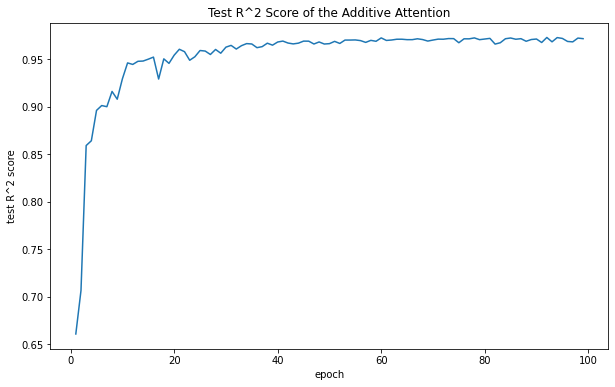

In [12]:
# Plotting the accuracy of the additive attention
sns.lineplot(x='epoch', y='test R^2 score', data=results[1:])
plt.title('Test R^2 Score of the Additive Attention')
plt.gcf().set_size_inches(10, 6)
plt.show()

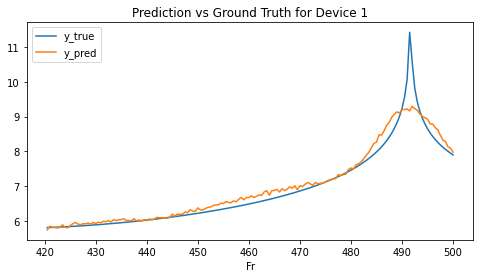

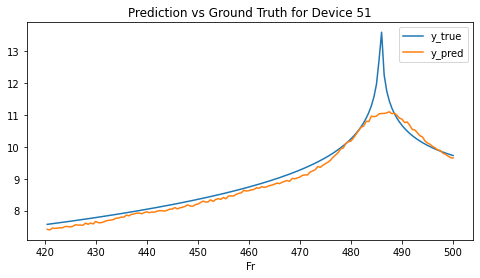

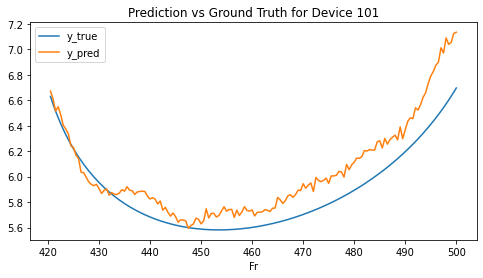

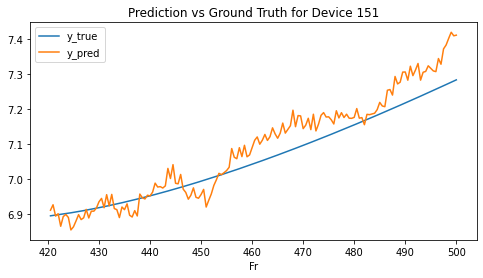

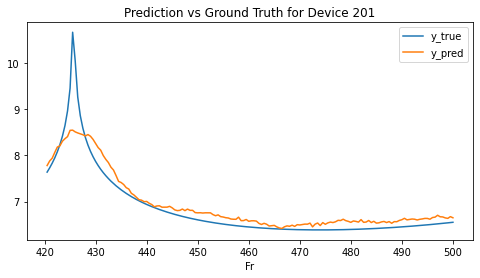

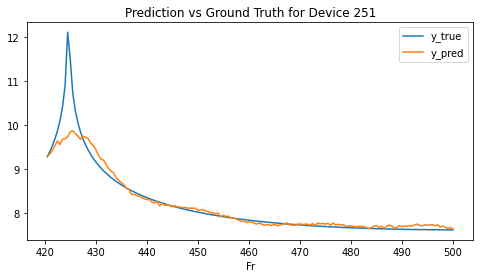

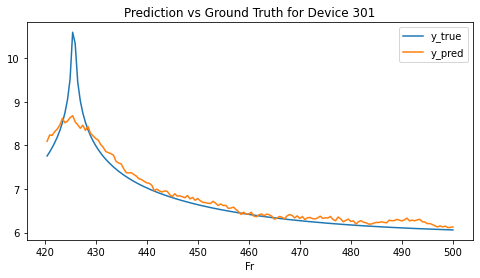

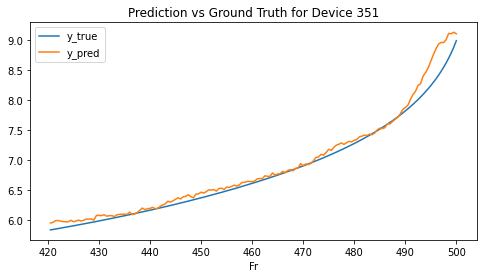

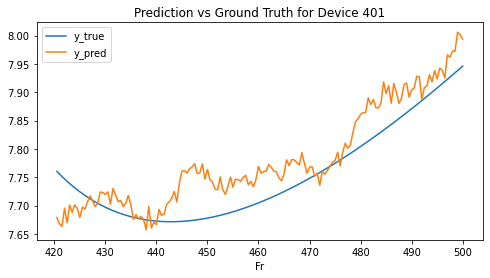

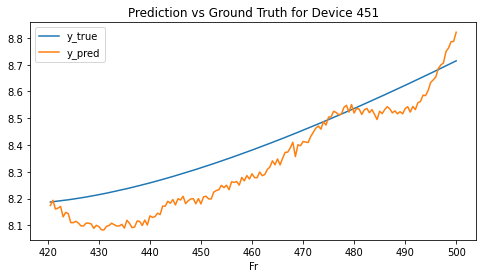

In [13]:
for i in range(1,n_test,50):
    graph_results(model,test_data,i,freqs)

In [14]:
[df_true, df_pred] = return_true_pred(model, test_data,n_test,freqs)

/content/Attention/Attention.py:1098: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_true[device_num] = pd.Series(y_true)
/content/Attention/Attention.py:1099: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pred[device_num] = pd.Series(y_pred[0])


In [ ]:
## Uncomment if you want to save the results
#torch.save(model,'./models/model_'+title_f+'.pt')
#df_true.to_csv('./csv_files/true_'+title_f+'.csv',index=False)
#df_pred.to_csv('./csv_files/pred_'+title_f+'.csv',index=False)
#results.to_csv('./csv_files/epochs_'+title_f+'.csv',index=False)